### <center> **UBER Drives Data Analysis** </center>

---

**<center> Author: Aravindan Natarajan </center>**
**<center>Version: 2.0</center>**

---

### **1. Import the Required Libraries**
---

In [71]:
# Import basic packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

# Warning handling
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Annotation function to display the numbers above bar for bargraphs

def annotate_values(ax):
  # Display counts at the top of the bars
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=8)

In [73]:
# Function to annotate a Seaborn box plot with quartiles, IQR, maximum, and minimum values.

def annotate_boxplot(data_series, ax=None):

    # Calculate quartiles and IQR
    q1, q2, q3 = data_series.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    # Get minimum and maximum values
    data_min = data_series.min()
    data_max = data_series.max()

    # Get plot limits
    x_min, x_max = ax.get_xlim()
    x_range = x_max - x_min

    # Adjust figure size based on x-range
    fig = plt.gcf()
    fig.set_size_inches(10 + x_range/20, 15)  # Adjust these values as needed

    # Annotate quartiles and IQR
    ax.text(q1, -0.3, f"Q1: {q1:.2f}", ha='center')
    ax.text(q2, 0.3, f"Q2 (Median): {q2:.2f}", ha='center')
    ax.text(q3, -0.4, f"Q3: {q3:.2f}", ha='center')
    ax.text((q1+q3)/2, 0.2, f"IQR: {iqr:.2f}", ha='center', va='center')

    # Annotate minimum and maximum
    ax.text(data_min, -0.2, f"Min: {data_min:.2f}", ha='center')
    ax.text(data_max, 0.1, f"Max: {data_max:.2f}", ha='center')

    return ax

### **2. Import the Dataset**
---

In [74]:
# Load the dataset into a dataframe
udrives_df = pd.read_csv(r'..\data\uberdrives.csv')

### **3. Exploratory Data Analysis(EDA)**
---

In [75]:
# Visulaize the dataset
udrives_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [76]:
# Information on the dataset
udrives_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [77]:
# Check for null values
udrives_df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

#### **3a. Data cleaning**
---

In [78]:
# Strip the '*' from the column names
udrives_df.columns = udrives_df.columns.str.replace("*", "")
udrives_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The START_DATE and the END_DATE columns are in object data type. If these are converted to datetime datatype, further analysis will be meaningful. So let us convert those two columns. There was a date with a different format in one of the rows, thus used format='mixed' to resolve that.

In [79]:
# Convert the date columns to datetime datatype
udrives_df['START_DATE'] = pd.to_datetime(udrives_df['START_DATE'], format='mixed')
udrives_df['END_DATE'] = pd.to_datetime(udrives_df['END_DATE'], format='mixed')

In [80]:
# Verify the datatypes of the columns again
udrives_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [81]:
# Visulaize the dataset
udrives_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [82]:
# Null value information
udrives_df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

There are some significant number of null values in the purpose column as the customer may not specified the purpose. So let us impute the null values with "Not Applicable" for meaningful analysis.

In [83]:
# Impute NaN in the Purpose column with "Not Applicable"

udrives_df['PURPOSE'].fillna('Not Applicable', inplace=True)


In [84]:
udrives_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


#### **3b. Data Visualization**
---

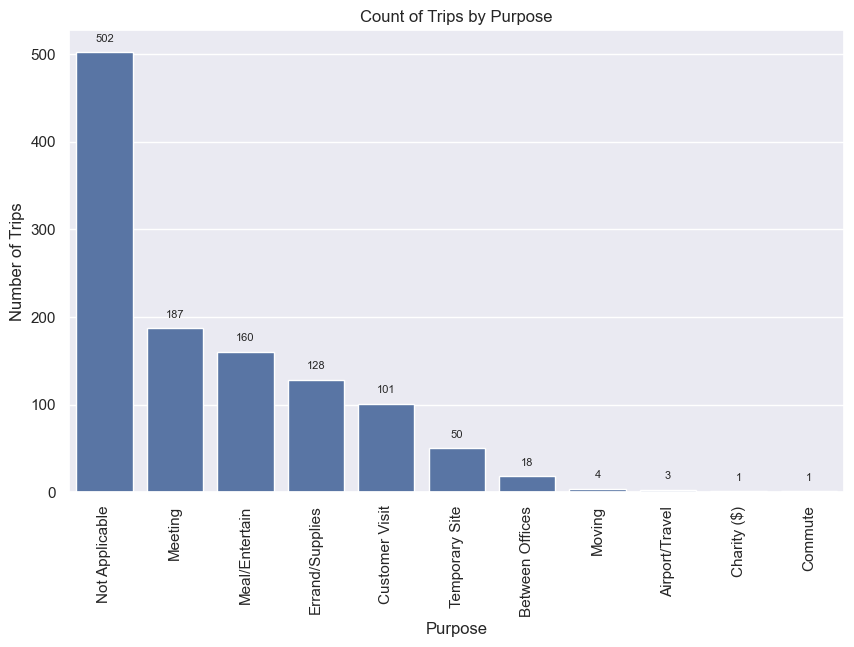

In [85]:
# Create a countplot for the purpose in the descending order
purpose_counts = udrives_df['PURPOSE'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='PURPOSE', data=udrives_df, order=purpose_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
annotate_values(ax1)
plt.show()

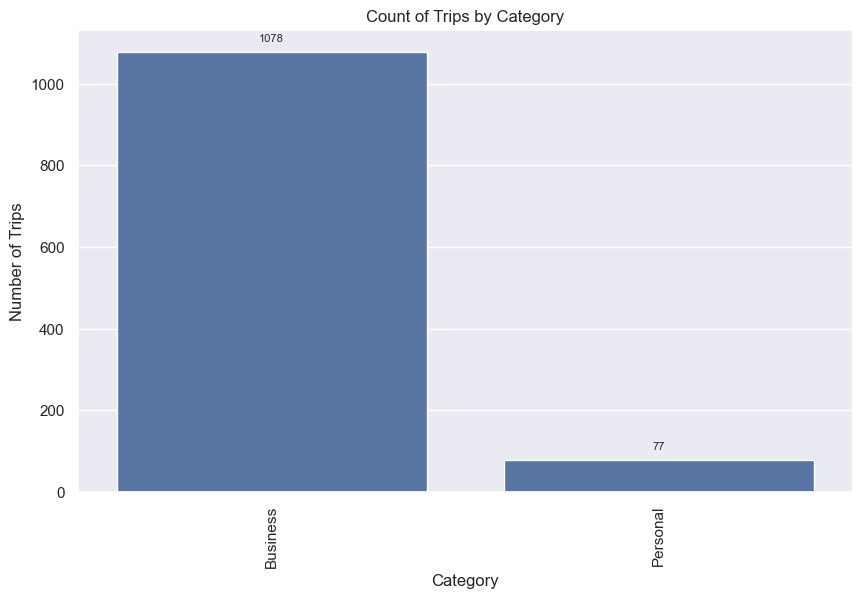

In [86]:
# Create a countplot for the Category in the descending order
category_counts = udrives_df['CATEGORY'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(x='CATEGORY', data=udrives_df, order=category_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Category')
plt.xlabel('Category')
plt.ylabel('Number of Trips')
annotate_values(ax2)
plt.show()

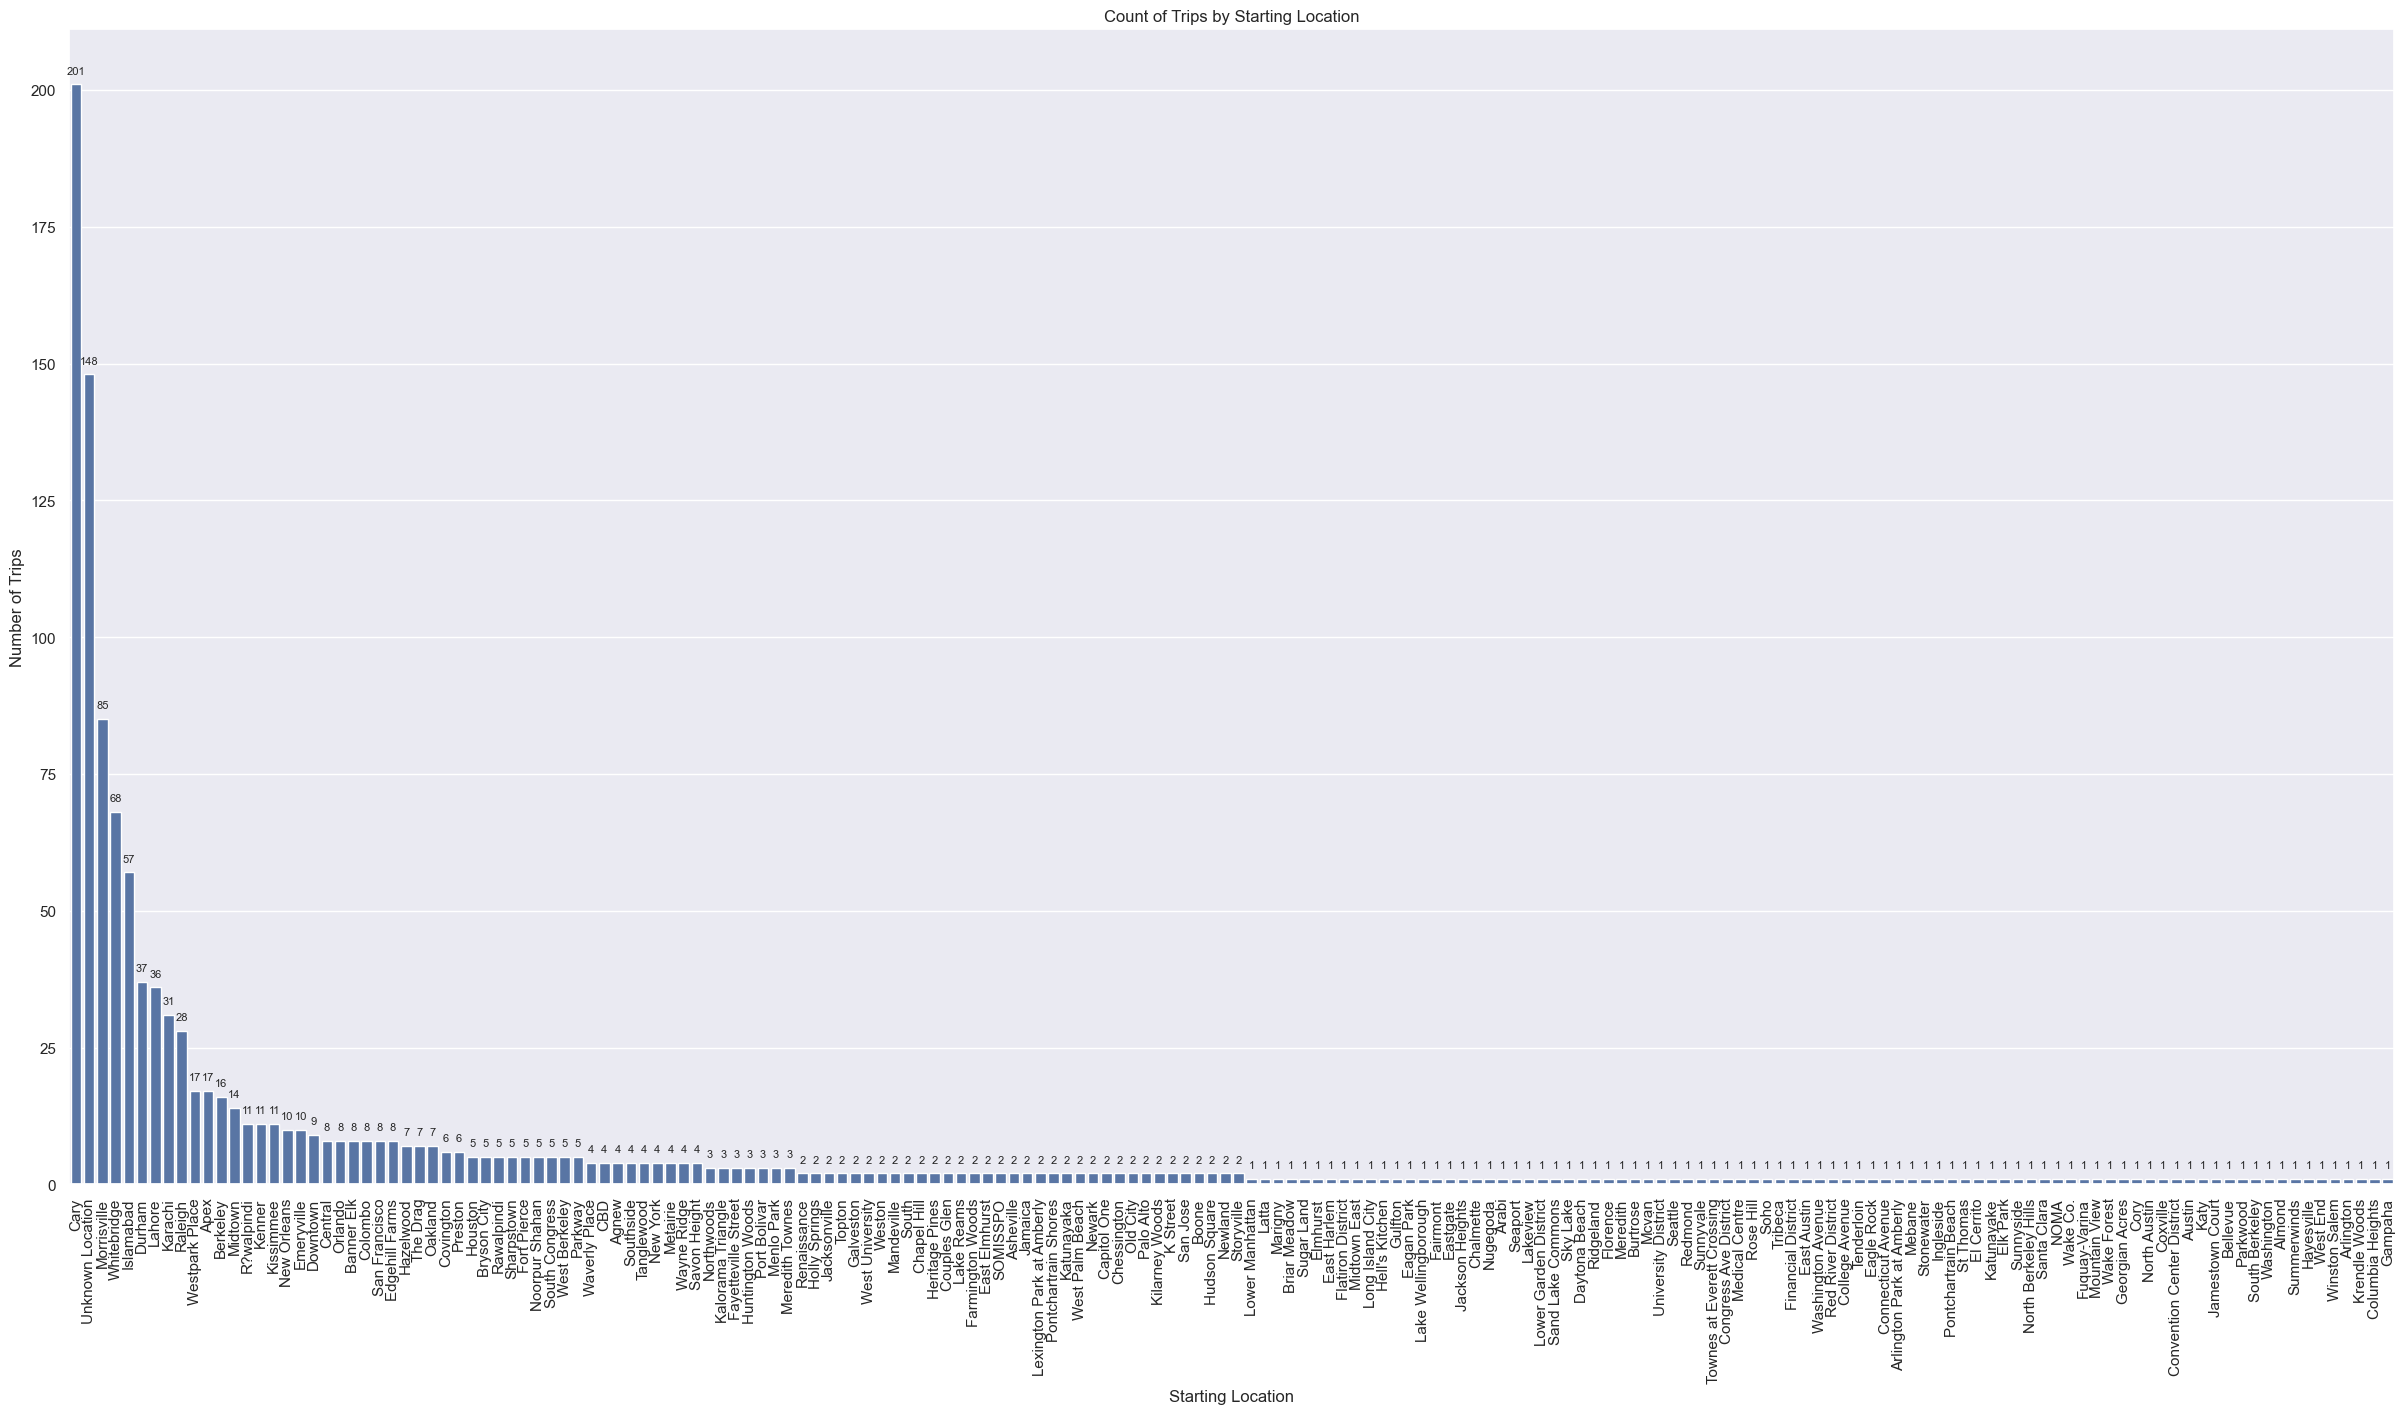

In [87]:
# Create a countplot for the Starting Location in the descending order
start_counts = udrives_df['START'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(30, 15))
ax3 = sns.countplot(x='START', data=udrives_df, order=start_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Starting Location')
plt.xlabel('Starting Location')
plt.ylabel('Number of Trips')
annotate_values(ax3)
plt.show()

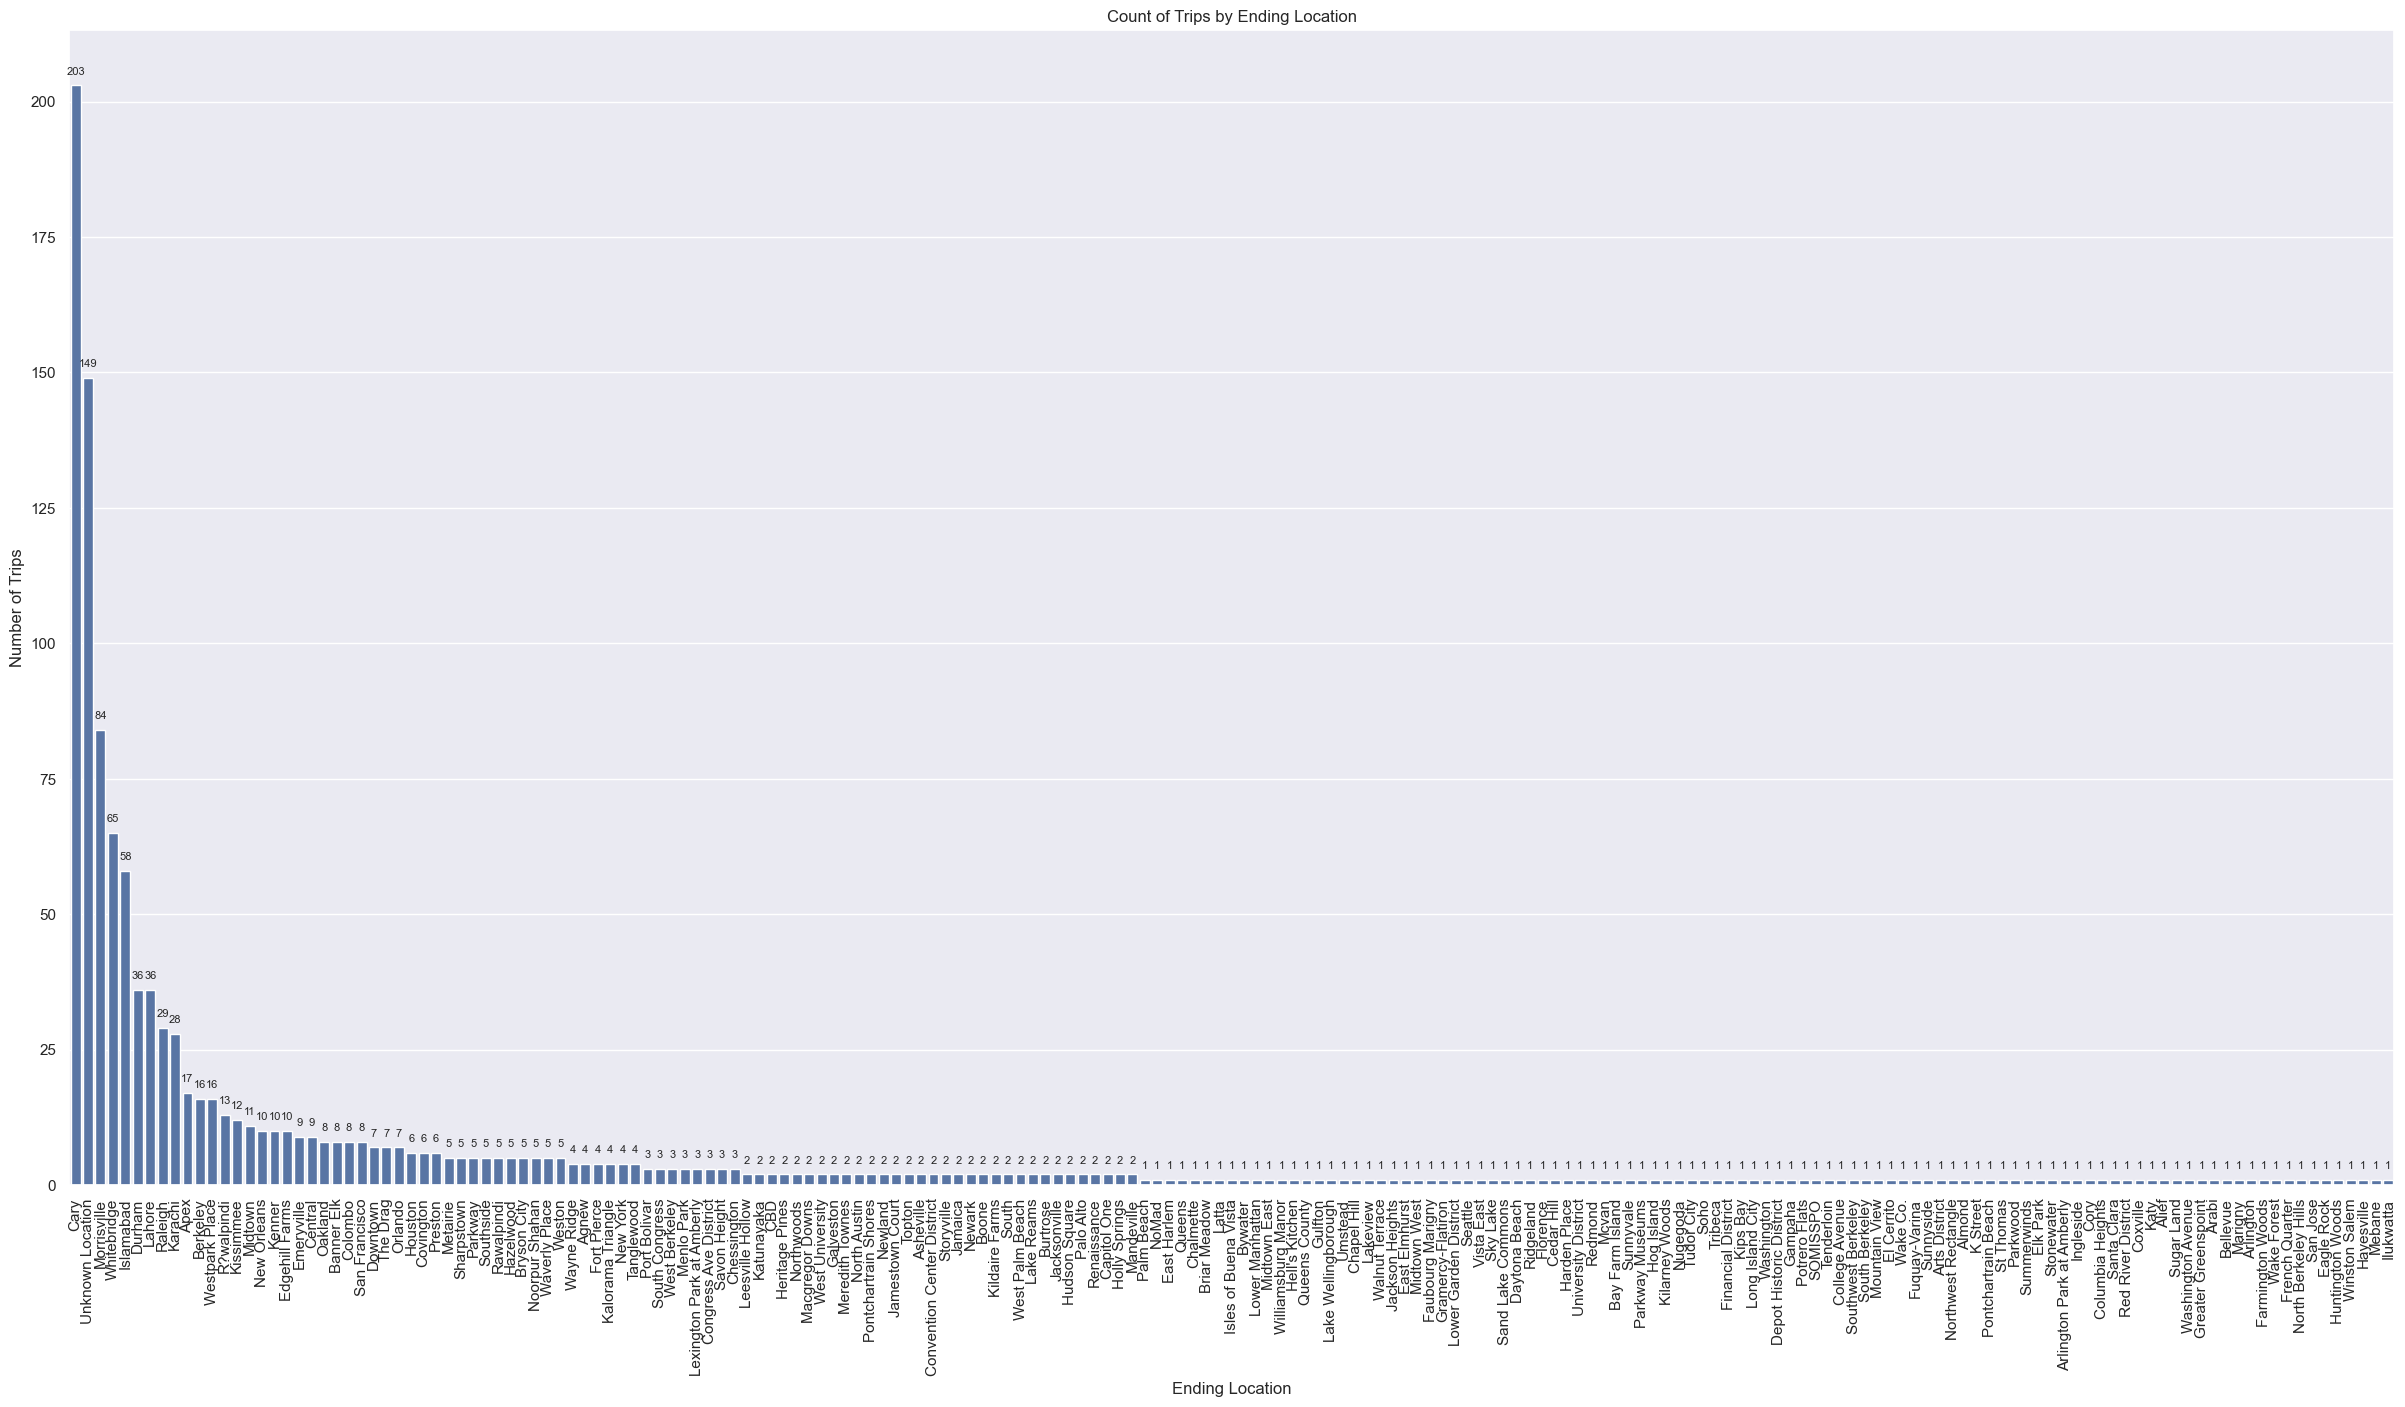

In [88]:
# Create a countplot for the Ending Location in the descending order
stop_counts = udrives_df['STOP'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(30, 15))
ax4 = sns.countplot(x='STOP', data=udrives_df, order=stop_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Ending Location')
plt.xlabel('Ending Location')
plt.ylabel('Number of Trips')
annotate_values(ax4)
plt.show()

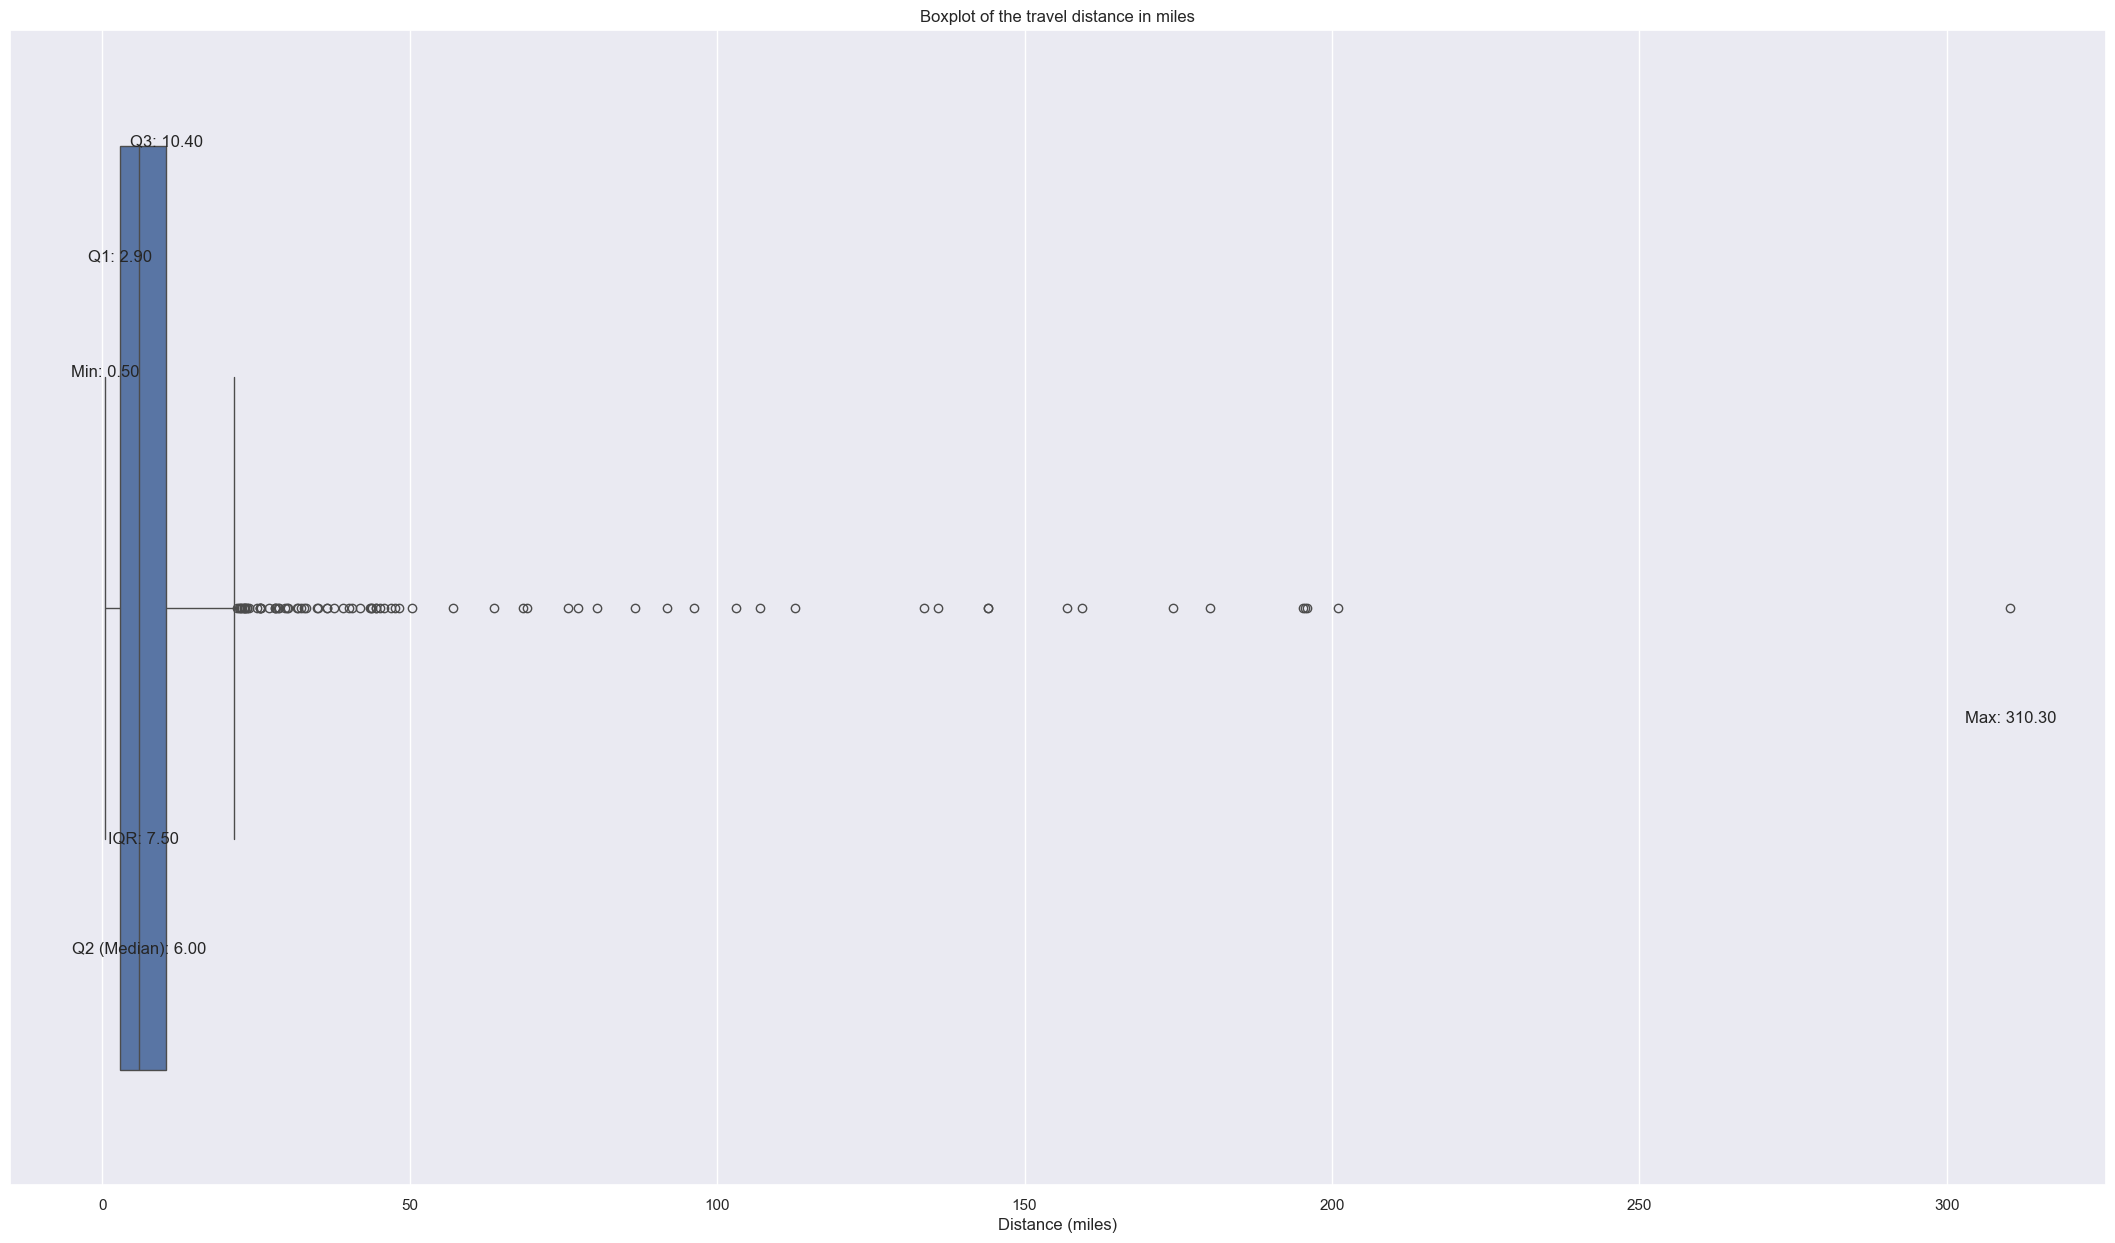

In [89]:
# Create a boxplot for the miles column
#plt.figure(figsize=(30,10))
ax12 = sns.boxplot(x=udrives_df['MILES'])
annotate_boxplot(udrives_df['MILES'],ax12)
plt.title('Boxplot of the travel distance in miles')
plt.xlabel('Distance (miles)')
plt.show()

Alright, now that we have imputed the null values we will proceed further for future engineering.

### **4. Feature Engineering**
---

The trip duration will be an intersting parameter for analysis. So let us create a new column called "DURATION". As the time is already given in the start and end date columns it is easier to create the duration in the minutes from them.

In [90]:
# Calculate the duration of the trip in minutes
udrives_df['DURATION'] = (udrives_df['END_DATE'] - udrives_df['START_DATE']).dt.total_seconds() / 60
udrives_df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Applicable,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


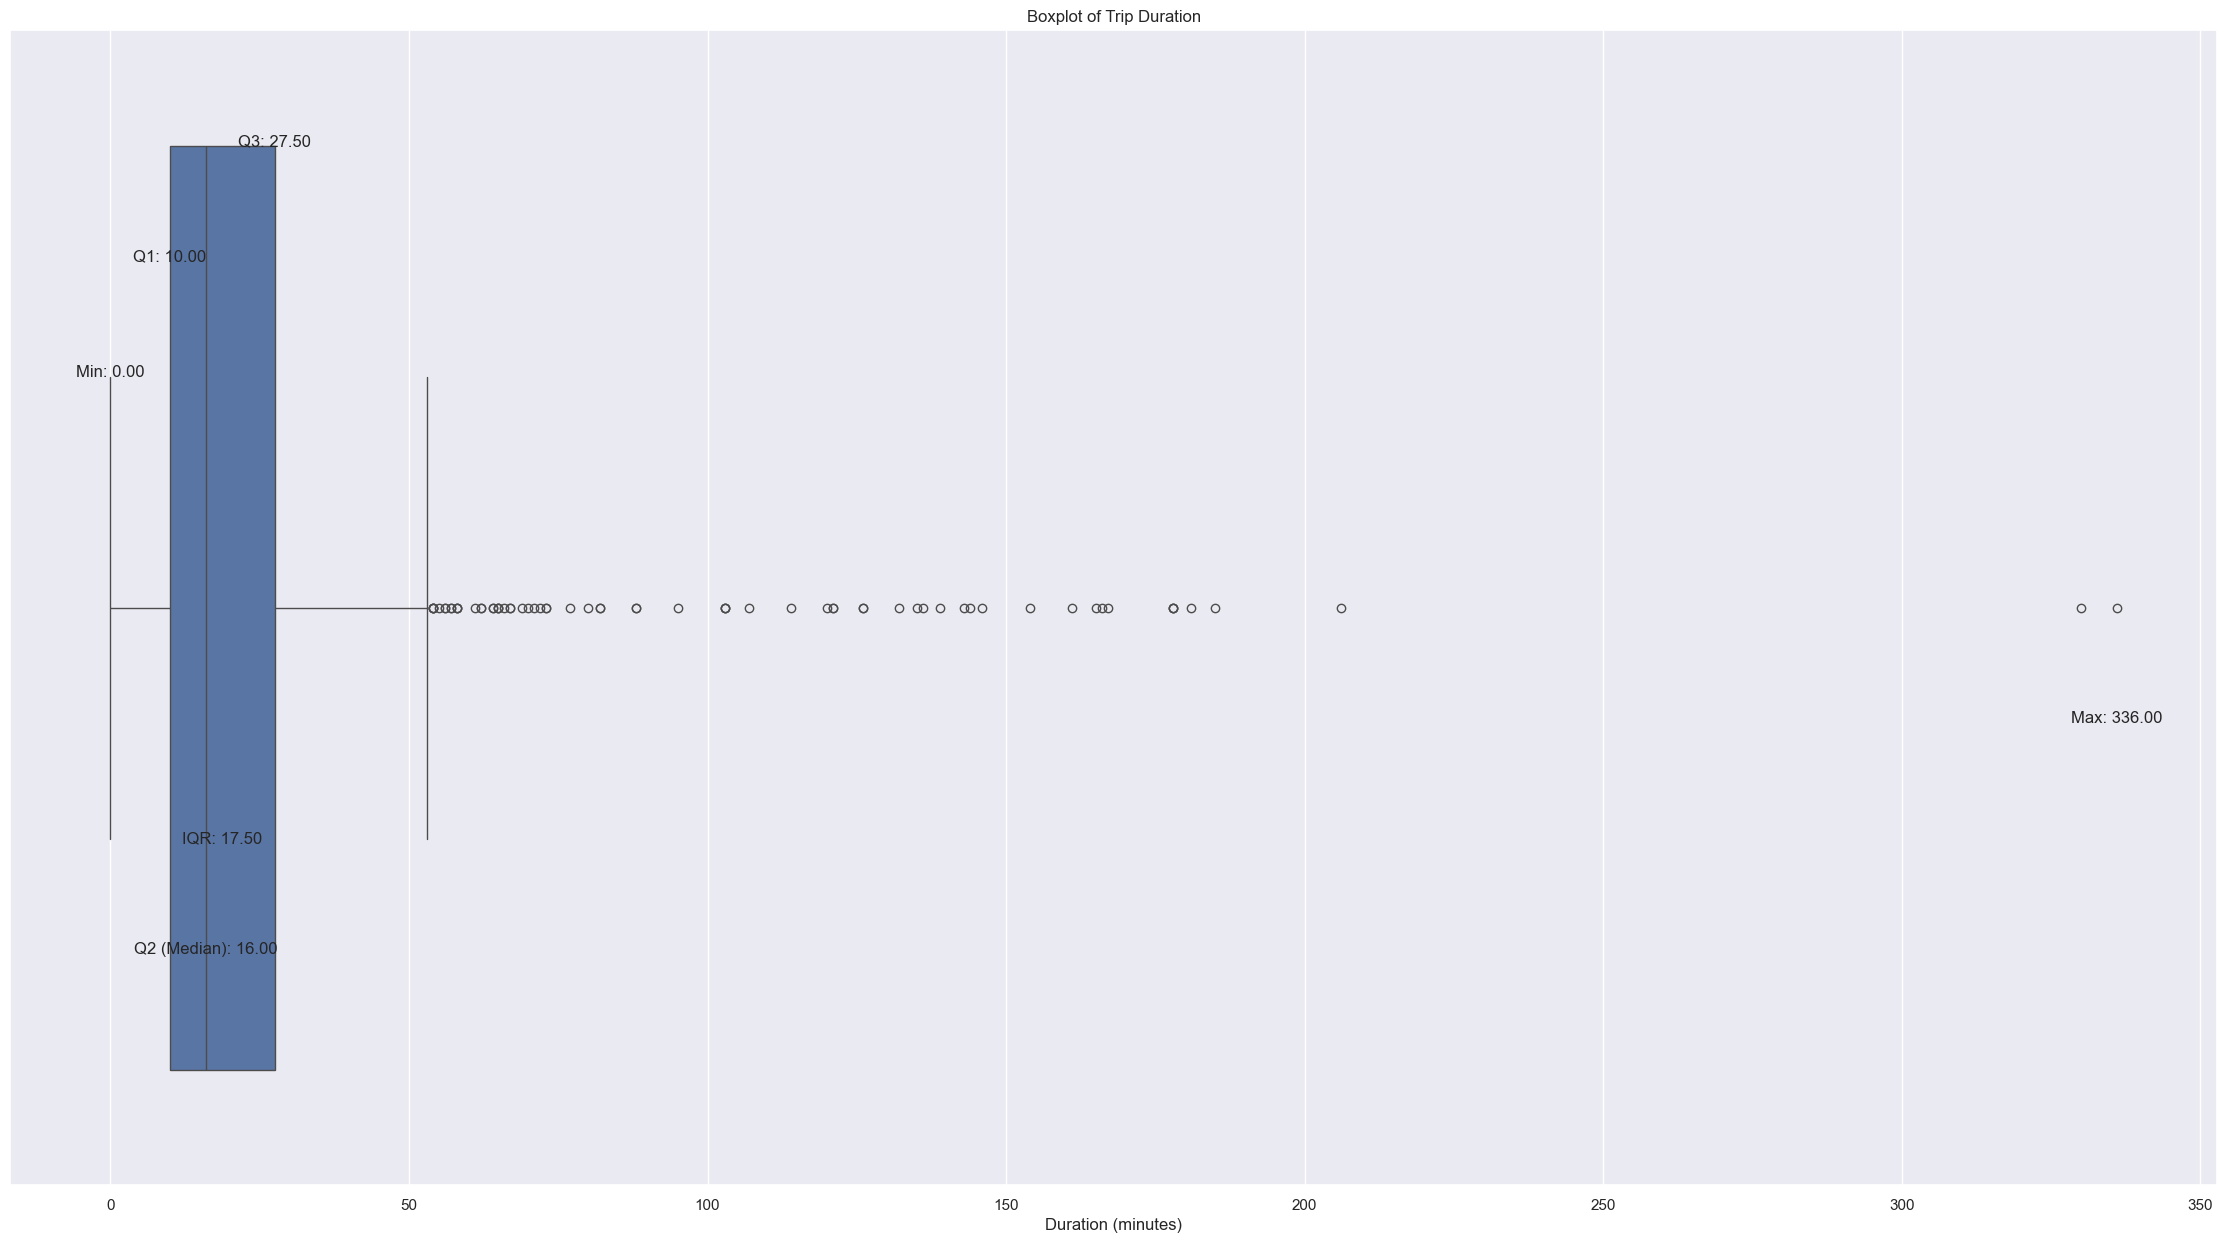

In [91]:
# Create an boxplot for the duration column
plt.figure(figsize=(10, 6))
ax13 = sns.boxplot(x=udrives_df['DURATION'])
annotate_boxplot(udrives_df['DURATION'],ax13)
plt.title('Boxplot of Trip Duration')
plt.xlabel('Duration (minutes)')
plt.show()

The day of the week from the END_DATE column will also be an interesting parameter for analysis.

In [92]:
# Extract the day of the week from the end_date column. Create a new column called "END_DATE"
udrives_df['DAY_OF_WEEK'] = udrives_df['END_DATE'].dt.day_name()
udrives_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Applicable,12.0,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday


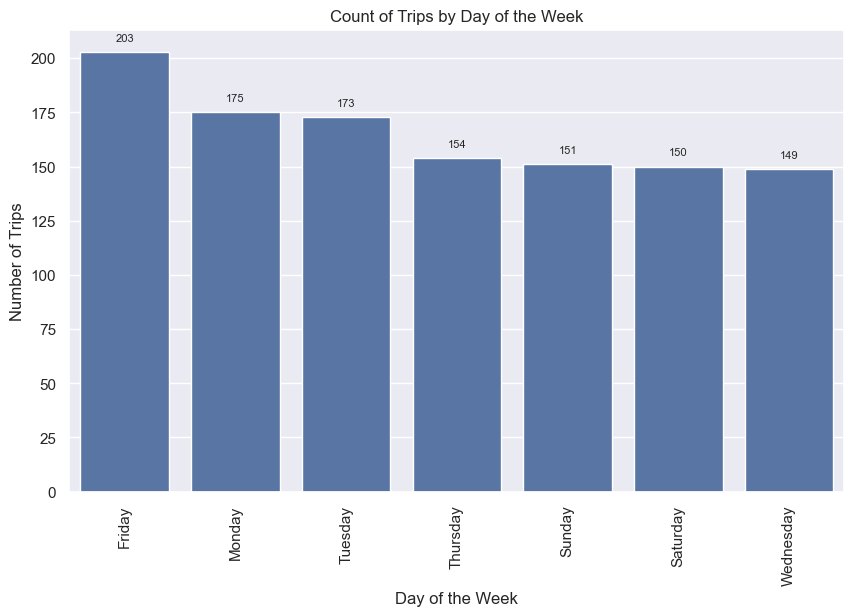

In [93]:
# Create a countplot for the Day of the week in the descending order
day_counts = udrives_df['DAY_OF_WEEK'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax5 = sns.countplot(x='DAY_OF_WEEK', data=udrives_df, order=day_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
annotate_values(ax5)
plt.show()

In [94]:
# Find the rows with duration>300
udrives_df[udrives_df['DURATION'] > 300]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY_OF_WEEK
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,330.0,Friday
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Not Applicable,336.0,Wednesday


Another interesting parameters are the year of the travel, the month, and the hour in which the travel commenced. So let us extract those.

In [95]:
# Extract the year from the start date column and create a new column called year

udrives_df['YEAR'] = udrives_df['START_DATE'].dt.year
udrives_df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY_OF_WEEK,YEAR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Applicable,12.0,Saturday,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,2016


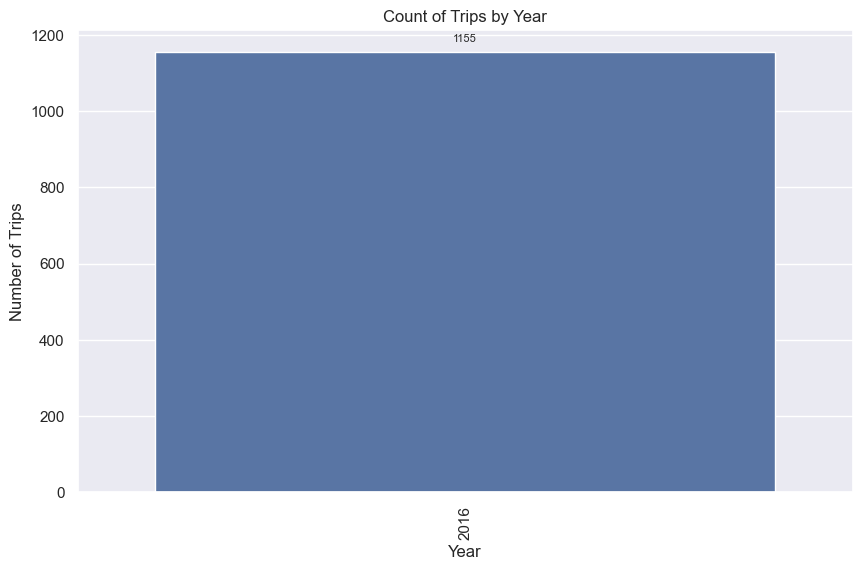

In [96]:
# Create a countplot for the Year of the travel in the descending order
year_counts = udrives_df['YEAR'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax6 = sns.countplot(x='YEAR', data=udrives_df, order=year_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
annotate_values(ax6)
plt.show()

In [97]:
# Extract the month from the start date column and create a new column called month

udrives_df['MONTH'] = udrives_df['START_DATE'].dt.month
udrives_df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY_OF_WEEK,YEAR,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,2016,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Applicable,12.0,Saturday,2016,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,2016,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,2016,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,2016,1


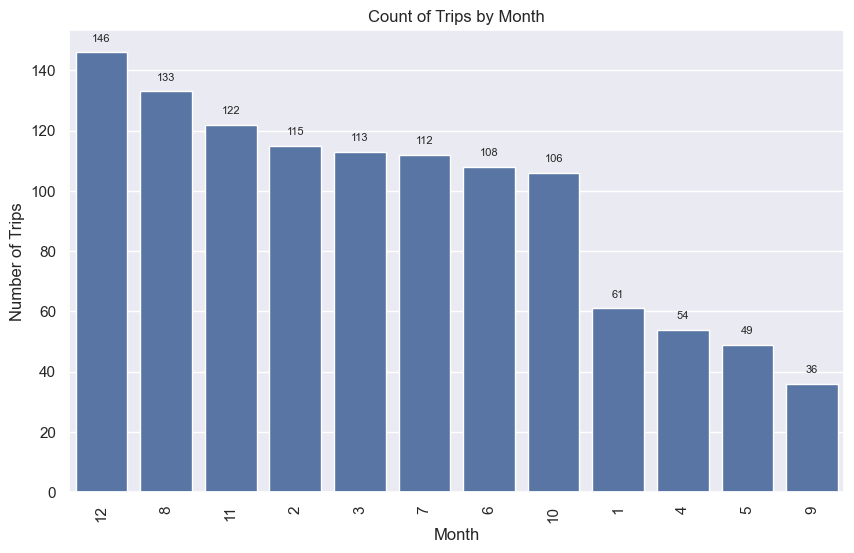

In [98]:
# Create a countplot for the Month of the travel in the descending order
month_counts = udrives_df['MONTH'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax7 = sns.countplot(x='MONTH', data=udrives_df, order=month_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
annotate_values(ax7)
plt.show()

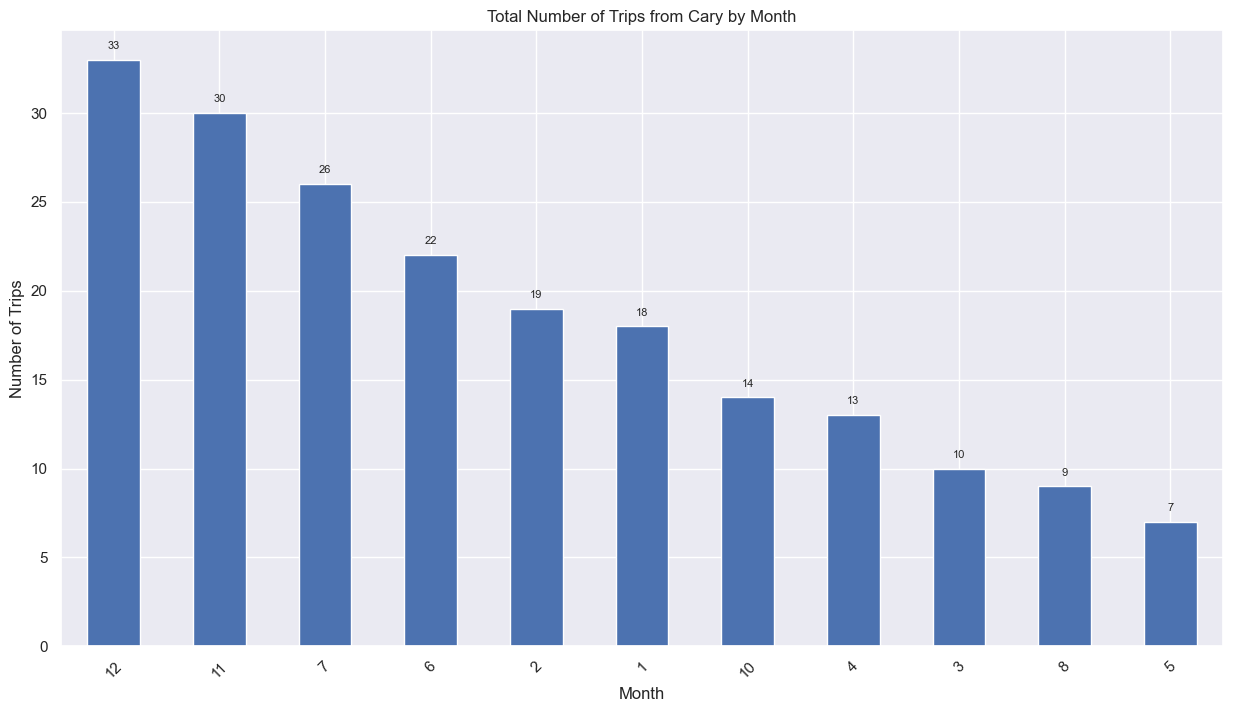

In [99]:
# Create a barplot by grouping the month and the start column to find out the total number of trips across location and month for the most travelled location cary in the descending order

# Group by month and start location, then count the number of trips
cary_trips_by_month = udrives_df[udrives_df['START'] == 'Cary'].groupby(['MONTH'])['START'].count().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(15, 8))
ax8 = cary_trips_by_month.plot(kind='bar')
plt.title('Total Number of Trips from Cary by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
annotate_values(ax8)
plt.show()

In [100]:
# Extract the hour from the start date column and create a new column called START_HOUR

udrives_df['START_HOUR'] = udrives_df['START_DATE'].dt.hour
udrives_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY_OF_WEEK,YEAR,MONTH,START_HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,2016,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Applicable,12.0,Saturday,2016,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,2016,1,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,2016,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,2016,1,14


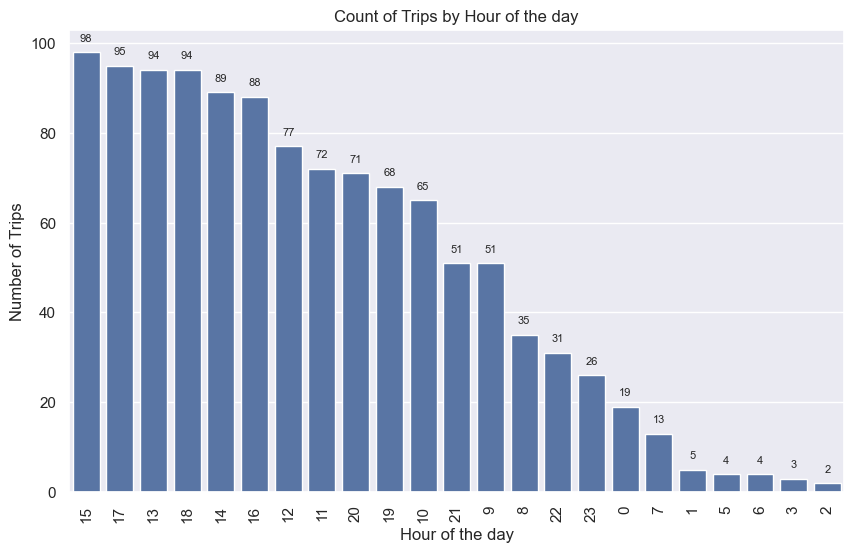

In [101]:
# Create a countplot for the Starting time of the travel in the descending order
hour_counts = udrives_df['START_HOUR'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax9 = sns.countplot(x='START_HOUR', data=udrives_df, order=hour_counts.index)
plt.xticks(rotation=90)
plt.title('Count of Trips by Hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Trips')
annotate_values(ax9)
plt.show()

Top 10 Most Frequent Routes:
START             STOP            
Unknown Location  Unknown Location    86
Morrisville       Cary                75
Cary              Morrisville         67
                  Cary                53
                  Durham              36
Durham            Cary                32
Unknown Location  Islamabad           28
Islamabad         Unknown Location    28
Lahore            Lahore              27
Islamabad         Islamabad           25
Name: START, dtype: int64


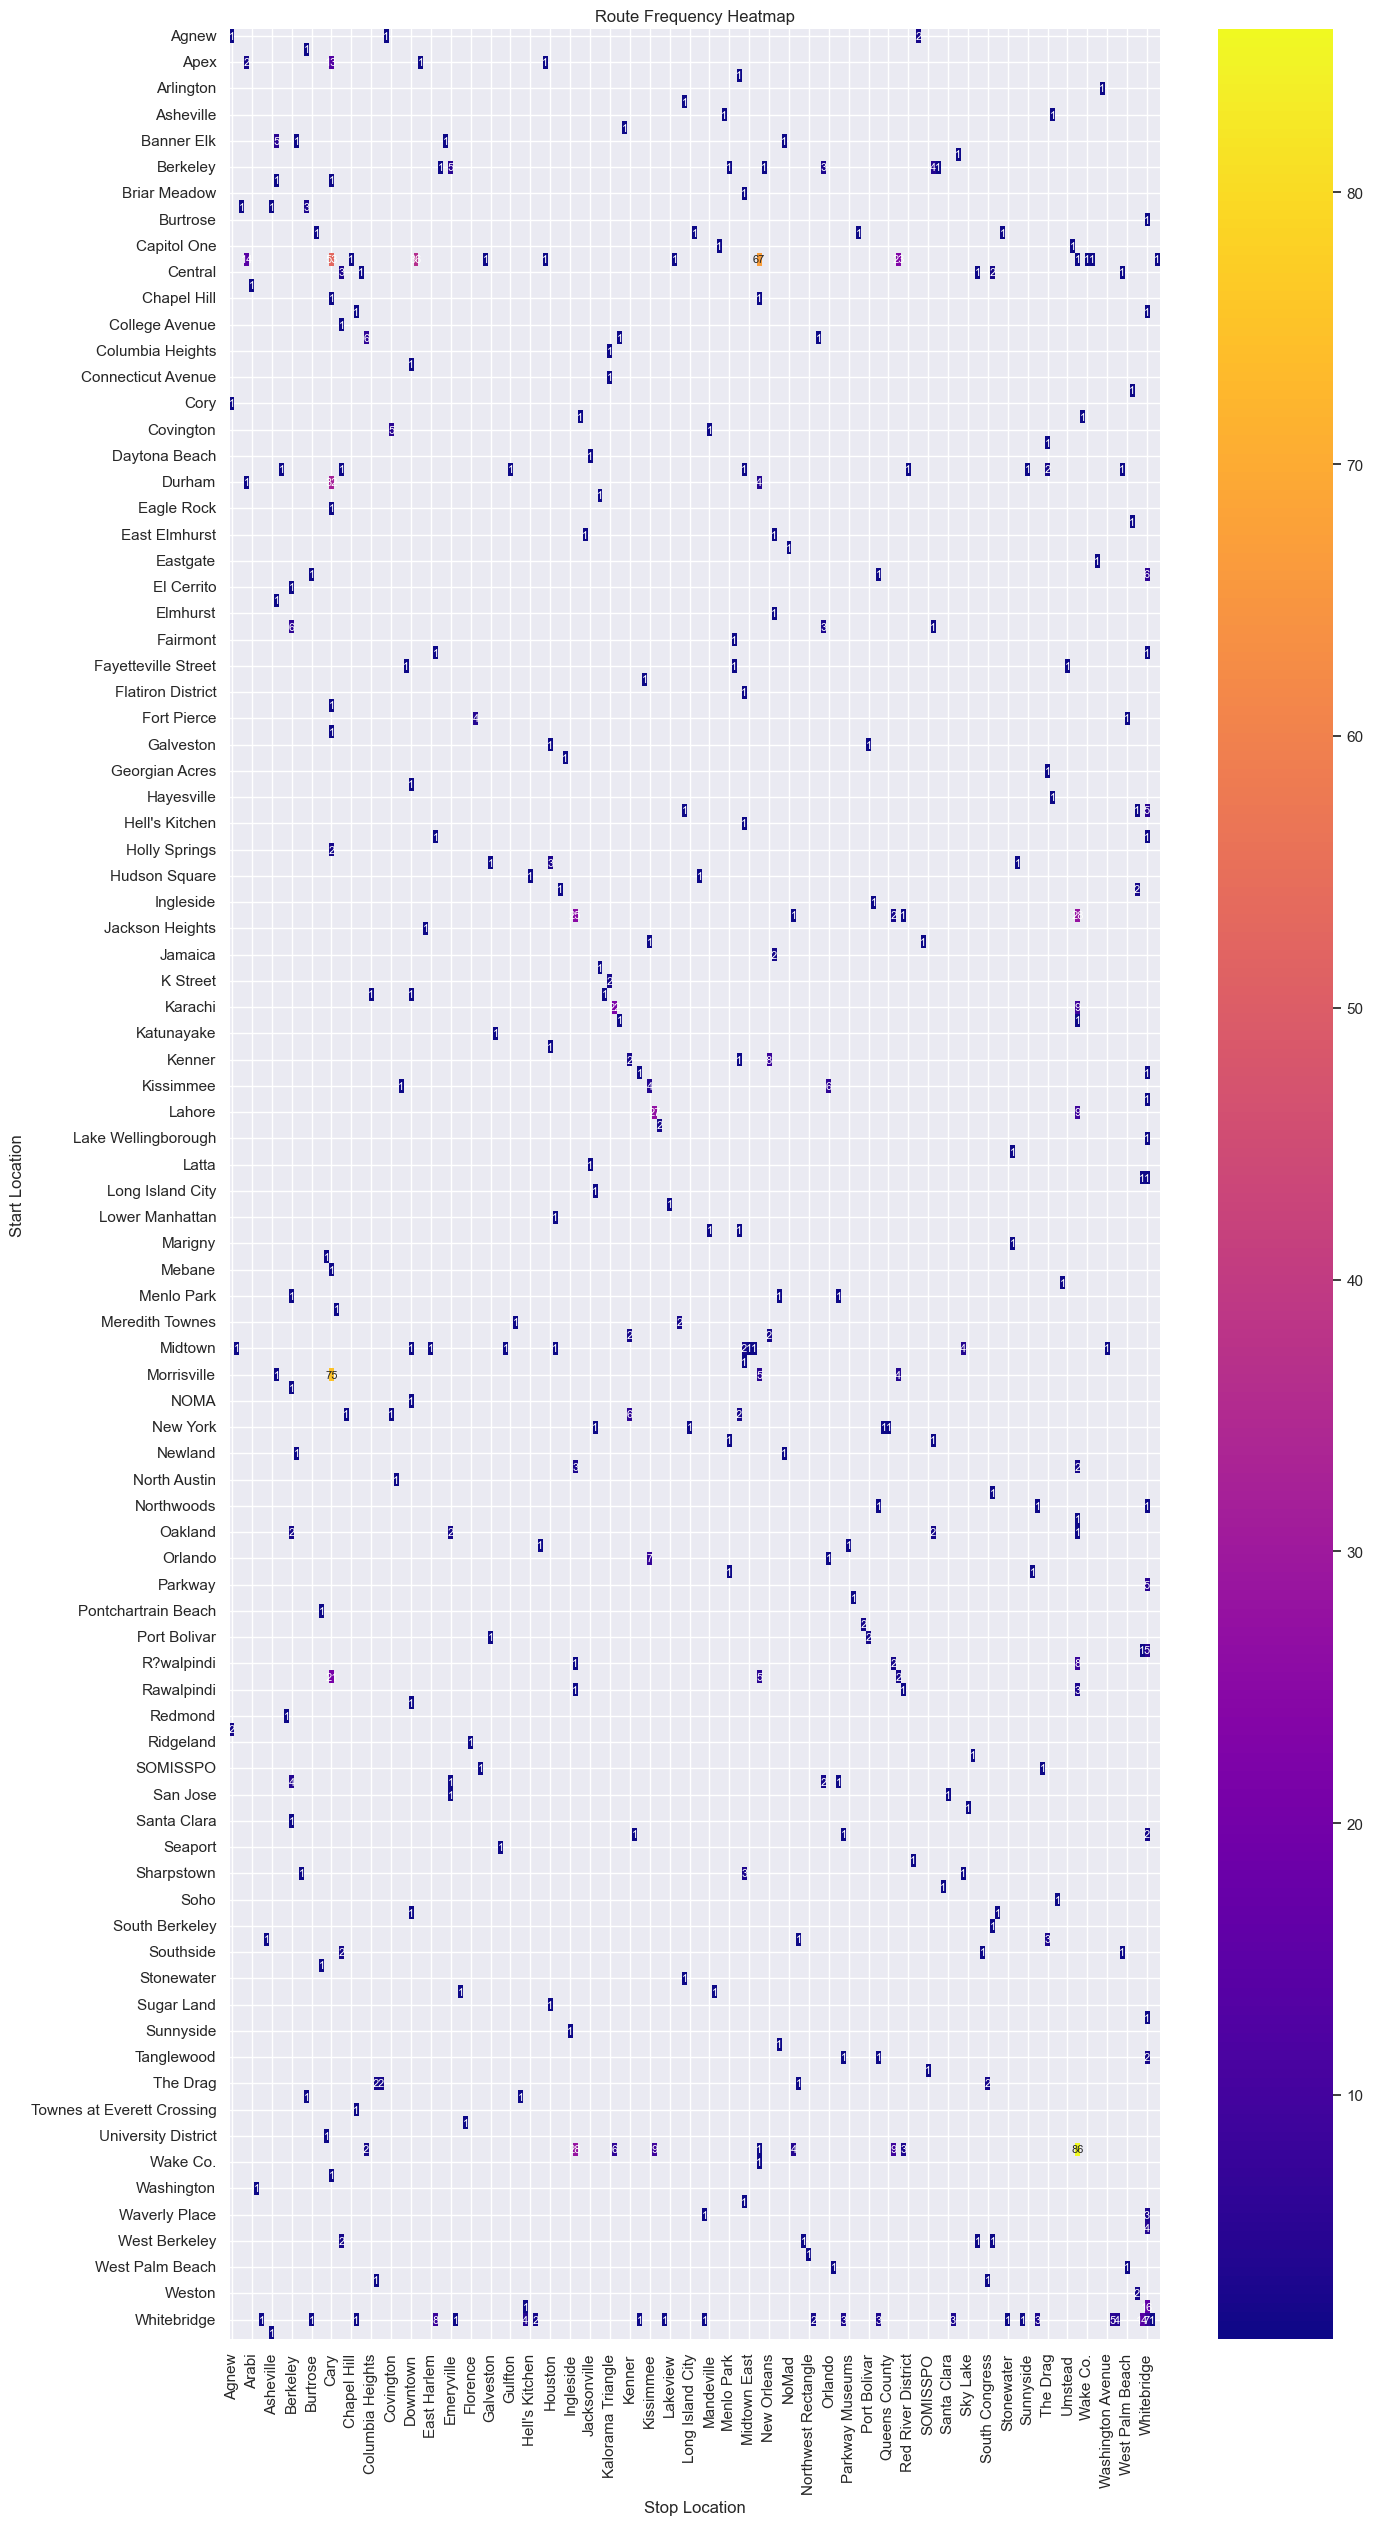

In [102]:
# Find the most frequent route taken by drivers
route_counts = udrives_df.groupby(['START', 'STOP'])['START'].count().sort_values(ascending=False)

# Display the top 10 most frequent routes
print("Top 10 Most Frequent Routes:")
print(route_counts.head(10))

# You can also visualize the most frequent routes using a heatmap
# Create a pivot table for route counts
route_pivot = udrives_df.groupby(['START', 'STOP'])['START'].count().unstack()

# Plot the heatmap
plt.figure(figsize=(15, 30))
sns.heatmap(route_pivot, annot=True, cmap='plasma', annot_kws={"size":8})
plt.title('Route Frequency Heatmap')
plt.xlabel('Stop Location')
plt.ylabel('Start Location')
plt.show()

This Jupyter notebook performs an exploratory data analysis (EDA) of Uber drives data.  Key findings include:

* **Trip Purpose:**  The most frequent trip purposes are "Meeting," "Meal/Entertain," and "Errand/Supplies," with a significant number categorized as "Not Applicable."
* **Trip Category:** The data predominantly consists of "Business" trips.
* **Location Analysis:** The analysis reveals the most frequent starting and ending locations for the trips, visualized using countplots.  Cary appears as a significant starting location, with trip frequency by month also explored.
* **Trip Distance (Miles):** A boxplot shows the distribution of trip distances, with annotations indicating quartiles, median, minimum, and maximum values.
* **Trip Duration:**  A new 'DURATION' column was calculated and visualized with a boxplot, showing the distribution of trip times in minutes.  Some unusually long durations were noted.
* **Day of the Week and Time of Day:** The number of trips varies across days of the week and hours of the day, with visualizations revealing peak travel times.
* **Temporal Analysis:** Trips were analyzed by year and month, showing trends in travel frequency.
* **Frequent Routes:** The notebook identifies and visualizes the most frequent routes taken, providing insights into popular travel patterns using both a textual summary and a heatmap.
